<a href="https://colab.research.google.com/github/Guru-yash/HeartDiseasePrediction/blob/master/Heart_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [18]:
heart_df=pd.read_csv("/content/drive/My Drive/heart.csv")
heart_df.head()
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#Data summary


In [19]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#Data Preprocessing

In [20]:
#Checking Null values
heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [21]:
#Duplicate check
heart_df.duplicated().sum()

np.int64(0)

In [22]:
#unique value check : we want to convert categorical value into numerical value
heart_df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [23]:
heart_df.select_dtypes(include='object').columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Sex: M-0, F-1
ChestPain : ATA-0,NAP-1,ASY-2,TA-3
RestingECG : Normal-0, ST-1,LVH-2
ExerciseAngina : N-0,Y-1
ST_Slope : Up-0, Flat-1,Down-2

In [24]:
heart_df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [90]:
cat_col = heart_df.select_dtypes(include='object').columns

for col in cat_col:
  print(col)
  print((heart_df[col].unique()),list(range(heart_df[col].nunique())))
  heart_df[col].replace((heart_df[col].unique()),range(heart_df[col].nunique()),inplace=True)
  print('*'*90)
  print()

Sex
['M' 'F'] [0, 1]
******************************************************************************************

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
******************************************************************************************

RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
******************************************************************************************

ExerciseAngina
['N' 'Y'] [0, 1]
******************************************************************************************

ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
******************************************************************************************



In [26]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [27]:
heart_df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [28]:
np.nan

nan

In [91]:
heart_df['Cholesterol'].replace(0,np.nan,inplace=True)

In [30]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
after_impute=imputer.fit_transform(heart_df)
heart_df=pd.DataFrame(after_impute,columns=heart_df.columns)

In [31]:
heart_df['Cholesterol'].isna().sum()

np.int64(0)

In [32]:
count=0
for i in heart_df['Cholesterol']:
  if i==0:
    count+=1
print(count)

0


Doing the same Resting Blood Pressure


In [33]:
heart_df['RestingBP'][heart_df['RestingBP']==0]

,RestingBP
449,0.0


In [92]:
from sklearn.impute import KNNImputer
heart_df['RestingBP'].replace(0,np.nan,inplace=True)
imputer=KNNImputer(n_neighbors=3)
after_impute=imputer.fit_transform(heart_df)
heart_df=pd.DataFrame(after_impute,columns=heart_df.columns)

In [35]:
heart_df['RestingBP'].unique()
heart_df['RestingBP'].isnull().sum()

np.int64(0)

In [93]:
withoutOldPeak = heart_df.columns
withoutOldPeak = withoutOldPeak.drop('Oldpeak')
heart_df[withoutOldPeak]=heart_df[withoutOldPeak].astype('int32')

In [37]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(11)
memory usage: 46.7 KB


In [38]:
heart_df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
262,46,0,2,120,231,0,0,115,1,0.0,1,1


In [39]:
!pip install plotly

In [40]:
heart_df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.214164,0.263128,0.057108,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.179766,-0.009658,0.080395,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.214164,-0.179766,1.000000,0.073016,0.038855,0.155111,0.112067,-0.273076,0.324049,0.300846,0.352364,0.459017
RestingBP,0.263128,-0.009658,0.073016,1.000000,0.113194,0.067556,0.094144,-0.109329,0.152621,0.174464,0.082401,0.118333
Cholesterol,0.057108,0.080395,0.038855,0.113194,1.000000,0.058798,0.074925,-0.028855,0.083761,0.065988,0.071345,0.101263
FastingBS,0.198039,-0.120076,0.155111,0.067556,0.058798,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.112067,0.094144,0.074925,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.273076,-0.109329,-0.028855,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.324049,0.152621,0.083761,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.300846,0.174464,0.065988,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


In [41]:
import plotly.express as px

In [42]:
px.line(heart_df.corr()['HeartDisease'][:-1].sort_values())

In [43]:
px.sunburst(heart_df,path=['HeartDisease','Age'])

In [44]:
px.histogram(heart_df,x='Age',color='HeartDisease')

Percentage of Heart Disease Data Distribution


In [45]:
px.pie(heart_df,names='HeartDisease',title='Percentage')

In [46]:
px.violin(heart_df,x='HeartDisease',y='MaxHR',color='HeartDisease')

Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    heart_df.drop('HeartDisease',axis=1),
    heart_df['HeartDisease'],
    test_size=0.2,
    random_state=42,
    stratify=heart_df['HeartDisease']
)

#Logisitic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

solver=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
best_solver=''
test_score=np.zeros(6)
for i,n in enumerate(solver):
  lr=LogisticRegression(solver=n).fit(X_train,y_train)
  test_score[i]=lr.score(X_test,y_test)
  if lr.score(X_test,y_test)==test_score.max():
    best_solver=n

lr=LogisticRegression(solver=best_solver).fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test,lr_pred)}')

cm = confusion_matrix(y_test, lr_pred)
print("\nConfusion Matrix:")
print(cm)

LogisticRegression Score: 0.8586956521739131

Confusion Matrix:
[[67 15]
 [11 91]]


In [49]:
import pickle

# Save the trained Logistic Regression model to a pickle file
filename = 'logistic_regression_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

print(f"Logistic Regression model saved to {filename}")

Logistic Regression model saved to logistic_regression_model.pkl


#Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

d_tree=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
grid_search=GridSearchCV(d_tree,param_grid, cv=5)
grid_search.fit(X_train,y_train)
Ctree=DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train,y_train)
dtc_pred=Ctree.predict(X_test)
print("DecisionTree's Accuracy: ",accuracy_score(y_test,dtc_pred))

cm = confusion_matrix(y_test, dtc_pred)
print("\nConfusion Matrix:")
print(cm)

DecisionTree's Accuracy:  0.8097826086956522

Confusion Matrix:
[[65 17]
 [18 84]]


In [51]:
import pickle

# Save the trained Decision Tree model to a pickle file
filename = 'decision_tree_model.pkl'
pickle.dump(Ctree, open(filename, 'wb'))

print(f"Decision Tree model saved to {filename}")

Decision Tree model saved to decision_tree_model.pkl


#Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


rfc=RandomForestClassifier()
param_grid={
    'n_estimators':[50, 100],
    'max_features':['sqrt', 'log2'],
    'max_depth':[3, 5, 7],
}

grid_search = GridSearchCV(rfc,param_grid)
grid_search.fit(X_train,y_train)
rfctree=RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(X_train,y_train)
rfc_pred=rfctree.predict(X_test)
print("RandomForest's Accuracy: ",accuracy_score(y_test,rfc_pred))

cm = confusion_matrix(y_test, rfc_pred)
print("\nConfusion Matrix:")
print(cm)

RandomForest's Accuracy:  0.8913043478260869

Confusion Matrix:
[[72 10]
 [10 92]]


In [53]:
import pickle

# Save the trained Random Forest model to a pickle file
filename = 'random_forest_model.pkl'
pickle.dump(rfctree, open(filename, 'wb'))

print(f"Random Forest model saved to {filename}")

Random Forest model saved to random_forest_model.pkl


#MLP

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
mlp_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = mlp_model.evaluate(X_test, y_test)
print(f'MLP Test Accuracy: {accuracy}')

y_pred_prob = mlp_model.predict(X_test)
mlp_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, mlp_pred)
print("\nConfusion Matrix:")
print(cm)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5363 - loss: 10.1614 - val_accuracy: 0.5847 - val_loss: 2.3788
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6383 - loss: 3.8654 - val_accuracy: 0.6949 - val_loss: 1.5199
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6147 - loss: 3.4810 - val_accuracy: 0.6780 - val_loss: 1.3617
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5906 - loss: 2.9601 - val_accuracy: 0.6695 - val_loss: 1.1216
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6291 - loss: 1.9625 - val_accuracy: 0.7288 - val_loss: 1.0273
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6281 - loss: 1.9109 - val_accuracy: 0.7203 - val_loss: 0.8511
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5893 - loss: 1.5683 - val_accuracy: 0.6102 - val_loss: 0.7815
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6141 - loss: 1.2078 - val_accuracy: 0.6949 - val_lo

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Confusion Matrix:
[[58 24]
 [19 83]]


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout, Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [81]:
import pickle

# Save the trained MLP model to a file (using Keras save method)
filename = 'mlp_model.keras'
mlp_model.save(filename)

print(f"MLP model saved to {filename}")

MLP model saved to mlp_model.keras


#CNN model


In [61]:
df=pd.read_csv("/content/drive/My Drive/heart.csv")
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [62]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Select categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [64]:
# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Original training set shape:", X_train.shape)
print("New training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Original training set shape: (587, 15)
New training set shape: (587, 15)
Validation set shape: (147, 15)
Test set shape: (184, 15)


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training, validation, and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (587, 15)
X_val_scaled shape: (147, 15)
X_test_scaled shape: (184, 15)


In [66]:
# Reshape data for 1D CNN (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_val_reshaped shape:", X_val_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

X_train_reshaped shape: (587, 15, 1)
X_val_reshaped shape: (147, 15, 1)
X_test_reshaped shape: (184, 15, 1)


In [82]:
# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 13, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 4, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,561 (41.25 KB)

 Trainable params: 10,561 (41.25 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Compile the model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [84]:
# Train the model
history = cnn_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5081 - loss: 0.6936 - val_accuracy: 0.6735 - val_loss: 0.6724
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6838 - loss: 0.6623 - val_accuracy: 0.7347 - val_loss: 0.6450
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7381 - loss: 0.6257 - val_accuracy: 0.7415 - val_loss: 0.6049
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7233 - loss: 0.5819 - val_accuracy: 0.6803 - val_loss: 0.5863
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7446 - loss: 0.5507 - val_accuracy: 0.7755 - val_loss: 0.5096
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7911 - loss: 0.5029 - val_accuracy: 0.8095 - val_loss: 0.4695
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8518 - loss: 0.4187 - val_accuracy: 0.8299 - val_loss: 0.4512
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7981 - loss: 0.4456 - val_accuracy: 0.8163 - val_los

In [85]:
# Evaluate the model on the test data
loss, accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f'1D CNN Test Accuracy: {accuracy}')

# Get predictions and generate classification report
y_pred_prob = cnn_model.predict(X_test_reshaped)
cnn_pred = (y_pred_prob > 0.5).astype("int32") # Convert probabilities to binary predictions

print("\nClassification Report:")
print(classification_report(y_test, cnn_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8902 - loss: 0.2900 
1D CNN Test Accuracy: 0.8695651888847351
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        82
           1       0.91      0.84      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[74  8]
 [17 85]]


In [86]:
# Save the trained 1D CNN model to a file (using Keras save method)
filename = 'cnn_1d_model.keras'
cnn_model.save(filename)

print(f"1D CNN model saved to {filename}")

1D CNN model saved to cnn_1d_model.keras


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def get_scores(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, zero_division=0)
    }

# Collect scores for each model
results = {
    "Logistic Regression": get_scores(y_test, lr_pred),
    "Decision Tree": get_scores(y_test, dtc_pred),
    "Random Forest": get_scores(y_test, rfc_pred),
    "MLP": get_scores(y_test, mlp_pred),
    "1D CNN": get_scores(y_test, cnn_pred)
}

# Convert to DataFrame
results_df = pd.DataFrame(results).T

print("\n====== Model Performance Comparison ======")
print(results_df)



====== Model Performance Comparison ======
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.858696   0.858491  0.892157  0.875000
Decision Tree        0.809783   0.831683  0.823529  0.827586
Random Forest        0.891304   0.901961  0.901961  0.901961
MLP                  0.766304   0.775701  0.813725  0.794258
1D CNN               0.869565   0.914894  0.843137  0.877551


In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Re-create the X_test and y_test for integer-encoded models
# (Logistic Regression, Decision Tree, Random Forest)
# This uses the 'heart_df' which was integer-encoded
X_train_int_encoded, X_test_int_encoded, y_train_int_encoded, y_test_int_encoded = train_test_split(
    heart_df.drop('HeartDisease',axis=1),
    heart_df['HeartDisease'],
    test_size=0.2,
    random_state=42,
    stratify=heart_df['HeartDisease']
)

# --- 1️⃣ Logistic Regression ---
lr_prob = lr.predict_proba(X_test_int_encoded)[:, 1]   # Probabilities
auc_lr = roc_auc_score(y_test_int_encoded, lr_prob)

# --- 2️⃣ Decision Tree ---
dt_prob = Ctree.predict_proba(X_test_int_encoded)[:, 1]
auc_dt = roc_auc_score(y_test_int_encoded, dt_prob)

# --- 3️⃣ Random Forest ---
rf_prob = rfctree.predict_proba(X_test_int_encoded)[:, 1]
auc_rf = roc_auc_score(y_test_int_encoded, rf_prob)

# --- 4️⃣ MLP ---
# For MLP, use the X_test which was preprocessed for it (one-hot encoded, not scaled)
mlp_prob = mlp_model.predict(X_test)        # Probabilities from Keras model
auc_mlp = roc_auc_score(y_test, mlp_prob)

# --- 5️⃣ 1D CNN ---
# For 1D CNN, use the X_test_reshaped which was preprocessed for it
cnn_prob = cnn_model.predict(X_test_reshaped)
auc_cnn = roc_auc_score(y_test, cnn_prob)

# --- Print all AUC values ---
print("===== AUC Scores of All Models ====")
print(f"Logistic Regression AUC : {auc_lr}")
print(f"Decision Tree AUC       : {auc_dt}")
print(f"Random Forest AUC       : {auc_rf}")
print(f"MLP AUC                 : {auc_mlp}")
print(f"1D CNN AUC              : {auc_cnn}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
===== AUC Scores of All Models ====
Logistic Regression AUC : 0.9042324246771879
Decision Tree AUC       : 0.8755380200860832
Random Forest AUC       : 0.9307747489239598
MLP AUC                 : 0.8246054519368723
1D CNN AUC              : 0.9349593495934959


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


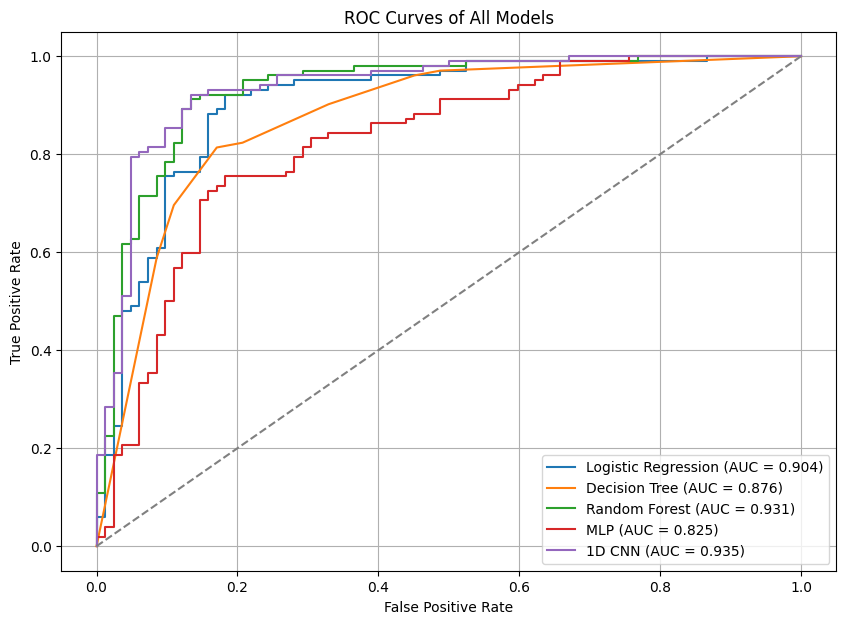

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# --- Get ROC curve values for each model ---

# Logistic Regression
lr_prob = lr.predict_proba(X_test_int_encoded)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_int_encoded, lr_prob)
auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
dt_prob = Ctree.predict_proba(X_test_int_encoded)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_int_encoded, dt_prob)
auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
rf_prob = rfctree.predict_proba(X_test_int_encoded)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_int_encoded, rf_prob)
auc_rf = auc(fpr_rf, tpr_rf)

# MLP
mlp_prob = mlp_model.predict(X_test)  # Use the correct MLP model variable
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_prob)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# 1D CNN
cnn_prob = cnn_model.predict(X_test_reshaped)  # Use the correct CNN model variable
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, cnn_prob)
auc_cnn = auc(fpr_cnn, tpr_cnn)

# --- Plot All ROC Curves ---
plt.figure(figsize=(10, 7))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC = {auc_mlp:.3f})")
plt.plot(fpr_cnn, tpr_cnn, label=f"1D CNN (AUC = {auc_cnn:.3f})")

# Diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves of All Models")
plt.legend()
plt.grid(True)
plt.show()